# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "q=" + city + "&appid=" + weather_api_key + "&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#     # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | ancud
Processing Record 4 of Set 1 | chibougamau
Processing Record 5 of Set 1 | sao vicente
Processing Record 6 of Set 1 | san felipe
Processing Record 7 of Set 1 | port saint john's
Processing Record 8 of Set 1 | woodhaven
Processing Record 9 of Set 1 | kodiak
Processing Record 10 of Set 1 | coahuayana de hidalgo
Processing Record 11 of Set 1 | beyneu
Processing Record 12 of Set 1 | ilulissat
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | tazovsky
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | fisterra
Processing Record 18 of Set 1 | bilibino
Processing Record 19 of Set 1 | fort st. john
Processing Record 20 of Set 1 | abepura
Processing Record 21 of Set 1 | isiro
Processing Record 22 of Set 1 | senanga
Processin

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,28.46,85,6,2.76,US,1724889266
1,waitangi,-43.9535,-176.5597,11.55,92,83,10.47,NZ,1724889267
2,ancud,-41.8697,-73.8203,9.76,83,3,1.91,CL,1724888872
3,chibougamau,49.9168,-74.3659,13.79,58,0,2.57,CA,1724888940
4,sao vicente,-23.9631,-46.3919,17.77,26,74,1.16,BR,1724889255


In [15]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [17]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,28.46,85,6,2.76,US,1724889266
1,waitangi,-43.9535,-176.5597,11.55,92,83,10.47,NZ,1724889267
2,ancud,-41.8697,-73.8203,9.76,83,3,1.91,CL,1724888872
3,chibougamau,49.9168,-74.3659,13.79,58,0,2.57,CA,1724888940
4,sao vicente,-23.9631,-46.3919,17.77,26,74,1.16,BR,1724889255


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

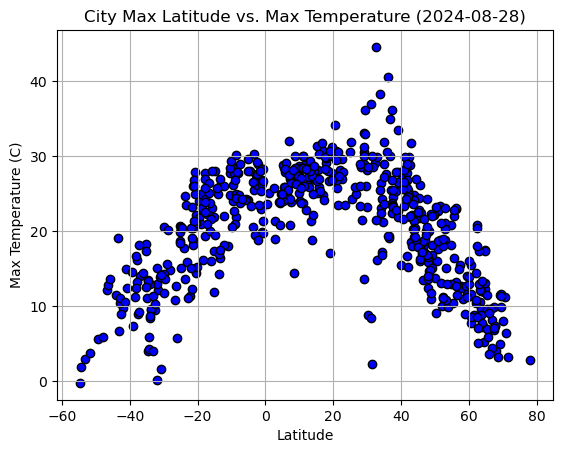

In [41]:
# Build scatter plot for latitude vs. temperature
lat_x_values = city_data_df["Lat"]
temp_y_values = city_data_df["Max Temp"]
plt.scatter(lat_x_values, temp_y_values, marker = 'o', facecolors= 'blue', edgecolors = 'black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Max Temperature (2024-08-28)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

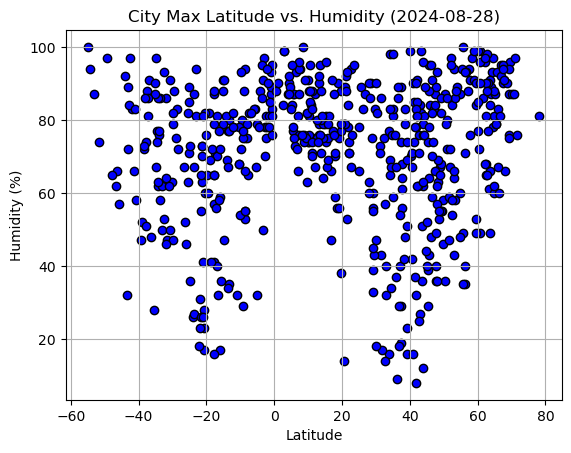

In [44]:
# Build the scatter plots for latitude vs. humidity
lat_x_values = city_data_df["Lat"]
humid_y_values = city_data_df["Humidity"]
plt.scatter(lat_x_values, humid_y_values, marker = 'o', facecolors= 'blue', edgecolors = 'black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Max Latitude vs. Humidity (2024-08-28)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

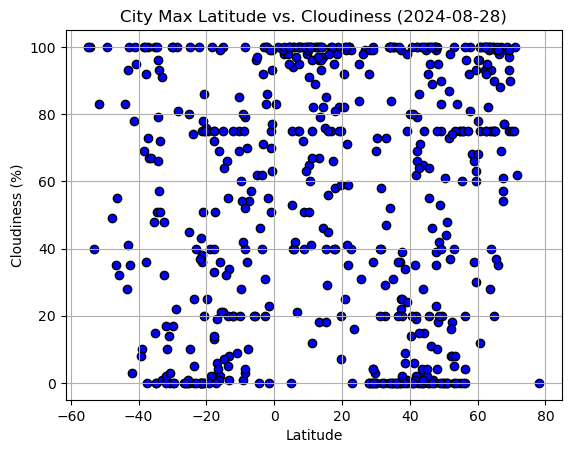

In [47]:
# Build the scatter plots for latitude vs. humidity
lat_x_values = city_data_df["Lat"]
cloud_y_values = city_data_df["Cloudiness"]
plt.scatter(lat_x_values, cloud_y_values, marker = 'o', facecolors= 'blue', edgecolors = 'black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Max Latitude vs. Cloudiness (2024-08-28)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

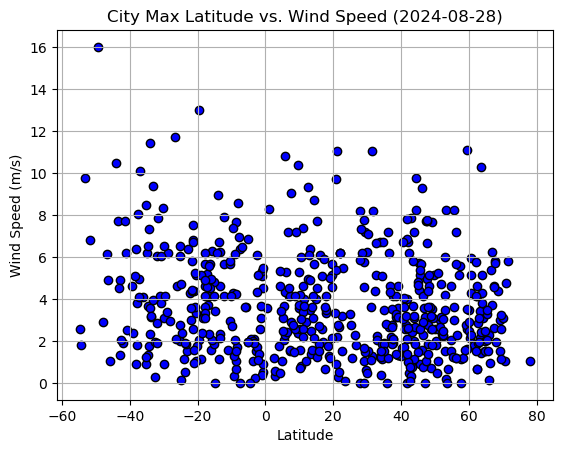

In [50]:
# Build the scatter plots for latitude vs. humidity
lat_x_values = city_data_df["Lat"]
wind_speed_y_values = city_data_df["Wind Speed"]
plt.scatter(lat_x_values, wind_speed_y_values, marker = 'o', facecolors= 'blue', edgecolors = 'black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Max Latitude vs. Wind Speed (2024-08-28)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [64]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates):
    # Perform linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create scatter plot
    plt.scatter(x_values, y_values, marker='o', facecolors='blue', edgecolors='black')
    
    # Plot the regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the linear equation on the plot
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    # Set labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    # Display the r-squared value
    print(f"The r-squared is: {rvalue**2}")
    
    # Show plot
    plt.show()

In [37]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,28.46,85,6,2.76,US,1724889266
3,chibougamau,49.9168,-74.3659,13.79,58,0,2.57,CA,1724888940
5,san felipe,10.3399,-68.7425,24.01,81,65,1.56,VE,1724889272
7,woodhaven,42.1389,-83.2416,25.57,91,100,6.69,US,1724889274
8,kodiak,57.7900,-152.4072,12.73,76,100,0.00,US,1724889275


In [39]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,waitangi,-43.9535,-176.5597,11.55,92,83,10.47,NZ,1724889267
2,ancud,-41.8697,-73.8203,9.76,83,3,1.91,CL,1724888872
4,sao vicente,-23.9631,-46.3919,17.77,26,74,1.16,BR,1724889255
6,port saint john's,-31.6229,29.5448,12.16,47,10,7.84,ZA,1724889273
12,punta arenas,-53.1500,-70.9167,3.06,87,40,9.77,CL,1724889133


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.5255870914462003


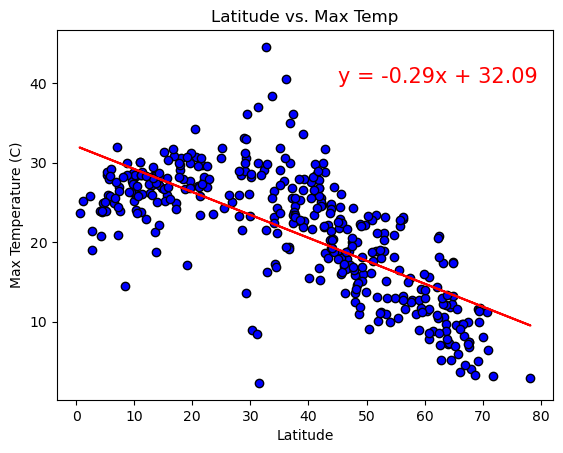

In [70]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
xlabel = 'Latitude'
ylabel = 'Max Temperature (C)'
title = 'Latitude vs. Max Temp'
text_coordinates = (45, 40)
plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates)

The r-squared is: 0.6391647973369303


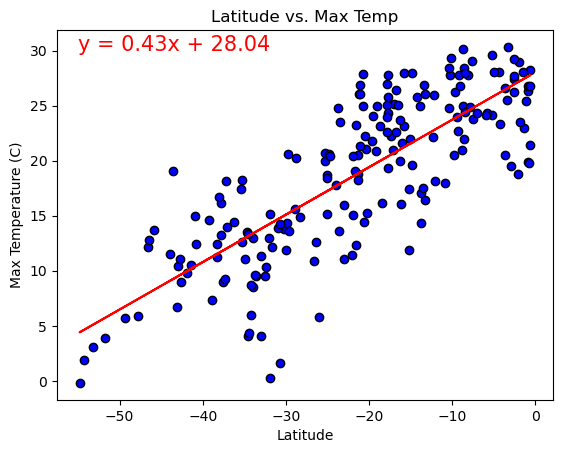

In [74]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
xlabel = 'Latitude'
ylabel = 'Max Temperature (C)'
title = 'Latitude vs. Max Temp'
text_coordinates = (-55, 30)
plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates)

**Discussion about the linear relationship:** There seems to be a loose relationship between temperature and latitude. As latitude moves away from zero, away from the equator, max temperature typically declines. This conclusion makes sense as the further North you move the colder it gets. Which again makes sense as the further you move South the colder it gets.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.0015828516849751928


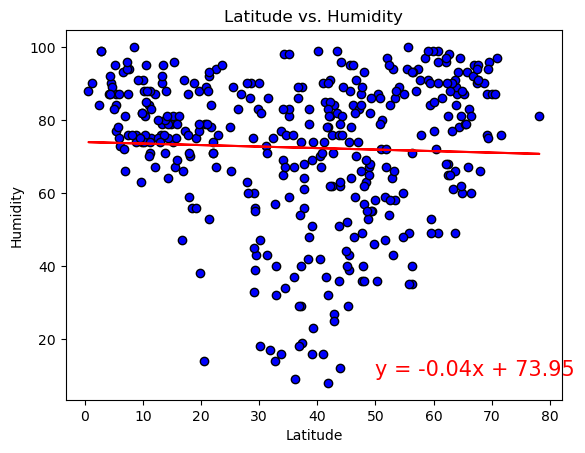

In [76]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
xlabel = 'Latitude'
ylabel = 'Humidity'
title = 'Latitude vs. Humidity'
text_coordinates = (50, 10)
plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates)

The r-squared is: 0.0007113427755722172


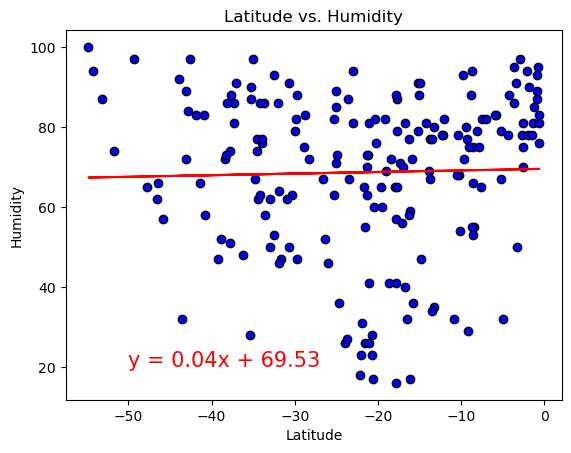

In [80]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
xlabel = 'Latitude'
ylabel = 'Humidity'
title = 'Latitude vs. Humidity'
text_coordinates = (-50, 20)
plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates)

**Discussion about the linear relationship:** The correlation is far too all over the place to draw a decisive conclusion. It is more than likely that there are other factors that have a bigger impact on humidity than just latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.009375269470638744


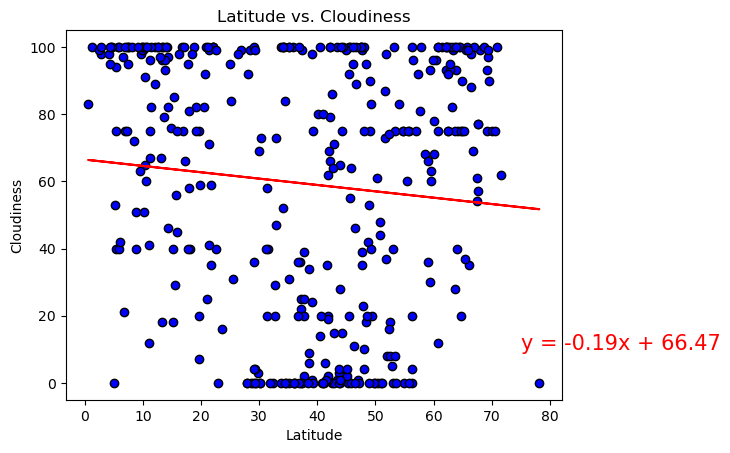

In [84]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
xlabel = 'Latitude'
ylabel = 'Cloudiness'
title = 'Latitude vs. Cloudiness'
text_coordinates = (75, 10)
plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates)

The r-squared is: 0.0011781168621640204


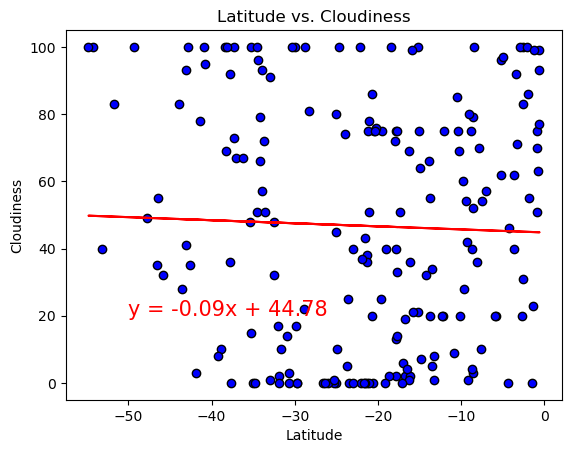

In [86]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
xlabel = 'Latitude'
ylabel = 'Cloudiness'
title = 'Latitude vs. Cloudiness'
text_coordinates = (-50, 20)
plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates)

**Discussion about the linear relationship:** Again there is no conclusive correlation between cloudinesss and latitude. Other factors are more likely to affect the presence of clouds than just latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.007003258176644679


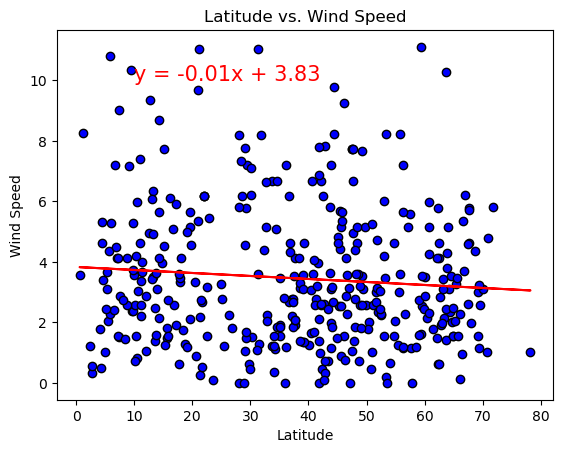

In [90]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
xlabel = 'Latitude'
ylabel = 'Wind Speed'
title = 'Latitude vs. Wind Speed'
text_coordinates = (10, 10)
plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates)

The r-squared is: 0.049797215033257826


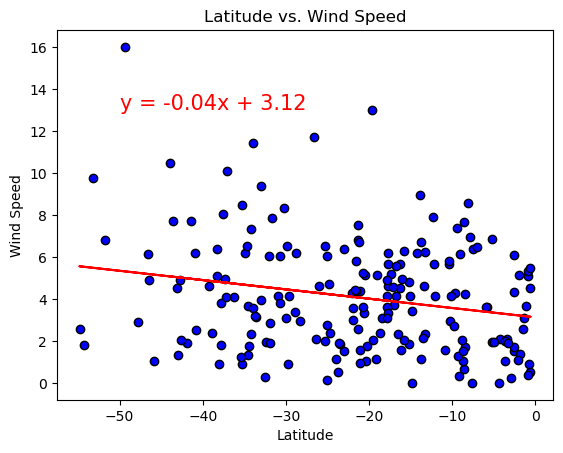

In [94]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
xlabel = 'Latitude'
ylabel = 'Wind Speed'
title = 'Latitude vs. Wind Speed'
text_coordinates = (-50, 13)
plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates)

**Discussion about the linear relationship:** Still there is no conclusive evidence to suggest that wind speed and latitude are directly correlated.